# Proyecto para Interconnect

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

# Tabla de contenido


1. [Introducción](#Introducción)

    1.1 [Objetivo general](#Objetivo-general)
    
    1.2 [Objetivos particulares](#Objetivos-particulares)


2. [Inicialización](#Inicialización)


3. [Cargar datos](#Cargar-datos)


4. [Descripción de los datos](#Descripción-de-los-datos)

    4.1 [Conclusión intermedia](#Conclusión-intermedia)
    

5. [Preprocesamiento de datos](#Preprocesamiento-de-datos)

    5.1 [Limpieza de datos](#Limpieza-de-datos)


6. [Análisis exploratorio de datos](#Análisis-exploratorio-de-datos)

    6.1 [Conclusión intermedia](#Conclusión-intermedia)
    
7. [Análisis estadístico de datos](#Análisis-estadístico-de-datos)

    7.1 [Conclusión intermedia](#Conclusión-intermedia) 

8. [Preguntas](#Preguntas) 



## Introducción

### Objetivo general

- Detectar usuarios de Interconnect que son potencialmente suceptibles a cancelar un servicio para encontrar una estrategia de retención a través de códigos promocionales u opciones de planes especiales.

### Objetivos particulares

- Verificar y realizar la limpieza de los datos con los que se va a trabajar.

- Hacer un análisis exploratorio de datos para encontrar información relevante que ayude en crear los parámetros de los modelos a crear o al menos darles mayor peso.

- Establecer los criterios que se van a utilizar para la predicción de usuarios que quieren cancelar su servicio con base en las conclusiones intermedias escritas en la etapa del análiss exploratorio de datos.

- Crear modelos de predicción y buscar el que mejor rendimiento haya obtenido en el periodo de evaluación.

- Entrenar los datos con el mejor modelo obtenido y delucidar cuáles fueron las carácteristicas principales de las observaciones que contribuyeron fuertemente en el entrenamiento, esto ayudará a ver los highlights de interés para crear estrategias de retención de clientes.

## Inicialización

In [2]:
pip install session_info

Note: you may need to restart the kernel to use updated packages.


In [34]:
# importar todas las librerías que se van a utilizar a lo largo del proyecto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import session_info

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# para el análisis estadístico de datos
from scipy import stats as st

# para la división y subconjunto de datos (entrenamiento y validación)
from sklearn.model_selection import train_test_split

## Cargar datos

In [4]:
# cargar las bases de datos
# para el correcto funcionamiento se va a ejecutar los datos en ambas situaciones, datos en ordenador local y con datasets

try:
    contract = pd.read_csv('/datasets/contract.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    personal = pd.read_csv('/datasets/personal.csv')
    phone = pd.read_csv('/datasets/phone.csv')

except:
    contract = pd.read_csv('final_provider/final_provider/contract.csv')
    internet = pd.read_csv('final_provider/final_provider/internet.csv')
    personal = pd.read_csv('final_provider/final_provider/personal.csv')
    phone = pd.read_csv('final_provider/final_provider/phone.csv')

## Descripción de los datos

In [5]:
print(contract.info())
contract.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [6]:
print(internet.info())
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [7]:
print(personal.info())
personal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [8]:
print(phone.info())
phone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — Información del contrato.
- `personal.csv` — Datos personales del cliente.
- `internet.csv` — Información sobre los servicios de Internet.
- `phone.csv` — Información sobre los servicios telefónicos.

Los datos contenido dentro de **contract.csv**:

- `costumerID` : Identificación del usuario.
- `BeginDate`: Fecha de inicio de subscripción del usuario.
- `EndDate` : Fecha de finalización de subscripción del usuario.
- `Type` : Tipo de plan de pago con respecto al tiempo de renovación.
- `PaperlessBilling` : Facturación digital.
- `PaymentMethod` : Método de pago.
- `MonthlyCharges` : Cargo mensual en USD.
- `TotalCharges` : Cargo total en USD.


Los datos contenido dentro de **internet.csv**:

- `costumerID` : Identificación del usuario.
- `InternetService` : Servicio de Internet.
- `OnlineSecurity` : Seguridad en línea.
- `OnlineBackup` : Copia de seguridad en la nube.
- `DeviceProtection` : Protección de dispositivo.
- `TechSupport` : Apoyo técnico.
- `StreamingTV` : Servicio de TV por streaming.
- `StreamingMovies` : Sevicio de películas por streaming.

Los datos de contenido dentro de **personal.csv**:

- `costumerID` : Identificación del usuario.
- `gender` : Género.
- `SeniorCitizen` : Persona de la tercera edad.
- `Partner` : Pareja.
- `Dependents` : Número de personas que dependan del usuario.

Los datos de contenido dentro de **phone.csv**:

- `costumerID` : Identificación del usuario.
- `MultipleLines` : Líneas múltiples.

### Conclusión intermedia

Por medio de la inspección inicial se determina que los conjuntos de datos anteriores no contienen valores ausentes, hace falta investigar si existen observaciones duplicadas, cambio del nombre de columnas a formato "sneake_case" (parte de la claridad del trabajo con las columnas) y el cambio de la tipografía de datos a su correspondiente más útil.

Otro punto a tomar en cuenta es que aparentemente el conjunto de datos obedecen a un mismo `customer_id`, sin embargo existen algunos conjuntos de datos como **internet** y **phone** que no cumplen con la misma cantidad de filas por lo que no es la misma cantidad de usuarios, esto quiere decir que no todos los usuarios contratan todos los servicios por lo queal juntar los dataframes, habrán columnas vacías.


## Preprocesamiento de datos

### Limpieza de datos

En esta etapa se harán movimientos que son el renombrar las columnas y el cambio de la tipología de los datos; para el primero crearemos los diccionarios correspondientes a cada una de las columnas y para el segundo se pretende crear una función que automatice el cambio de la tipología de datos.


In [9]:
## creación de los diccionarios para renombrar las columnas

column_contract_dict = {
    'customerID' : 'customer_id',
    'Begin_Date' : 'begin_date',
    'EndDate' : 'end_date',
    'Type' : 'type',
    'PaperlessBilling' : 'paperless_billing',
    'PaymentMethod' : 'payment_method',
    'MonthlyCharges' : 'monthly_charges',
    'TotalCharges' : 'total_charges'
}

column_internet_dict = {
    'customerID' : 'customer_id',
    'InternetService' : 'internet_service',
    'OnlineSecurity' : 'online_security',
    'OnlineBackup' : 'online_backup',
    'DeviceProtection' : 'device_protection',
    'TechSupport' : 'tech_support',
    'StreamingTV' : 'streaming_tv',
    'StreamingMovies' : 'streaming_movies'
}

column_personal_dict = {
    'customerID' : 'customer_id',
    'SeniorCitizen' : 'senior_citizen',
    'Partner' : 'partner',
    'Dependents' : 'dependents'
}

column_phone_dict = {
    'customerID' : 'customer_id',
    'MultipleLines' : 'multiple_lines'
}

In [10]:
## renombrar las columnas

contract.rename(columns = column_contract_dict, inplace = True)
internet.rename(columns = column_internet_dict, inplace = True)
personal.rename(columns = column_personal_dict, inplace = True)
phone.rename(columns = column_phone_dict, inplace = True)

In [11]:
## definir una función para el cambio de tipología de los datos

def transform_datatype(df):
    
    # Verificar el tipo de datos de cada columna
    print("Tipos de datos de cada columna:")
    print(df.dtypes)
    print("")

    # Verificar si se puede convertir cada columna al tipo de datos adecuado
    # with warnings.catch_warnings():
    #     warnings.simplefilter("ignore")
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_datetime(df[col])
                print(f"La columna '{col}' fue convertida a tipo de datos datetime")
            except ValueError:
                pass
            try:
                if df[col].isin(['Yes', 'No']).any():
                    df[col] = df[col].replace({'Yes': 1, 'No': 0})
                    df[col] = df[col].astype('bool')
                    print(f"La columna '{col}' fue convertida a tipo de datos bool")
            except ValueError or TypeError:
                pass
        elif df[col].dtype == 'float64':
            if df[col].min() >= 0 and df[col].max() <= 1:
                df[col] = df[col].astype('bool')
                print(f"La columna '{col}' fue convertida a tipo de datos bool")
        elif df[col].dtype == 'int64':
            if df[col].min() >= 0 and df[col].max() <= 1:
                df[col] = df[col].astype('bool')
                print(f"La columna '{col}' fue convertida a tipo de datos bool")
        elif df[col].dtype == 'int64':
            if df[col].min() >= 0 and df[col].max() <= 255:
                df[col] = df[col].astype('uint8')
                print(f"La columna '{col}' fue convertida a tipo de datos uint8")
        

    # Verificar los nuevos tipos de datos de cada columna
    print("")
    print("Nuevos tipos de datos de cada columna:")
    print(df.dtypes)

In [12]:
## ejecutar la función anterior

transform_datatype(contract)

Tipos de datos de cada columna:
customer_id           object
BeginDate             object
end_date              object
type                  object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
dtype: object

La columna 'BeginDate' fue convertida a tipo de datos datetime
La columna 'end_date' fue convertida a tipo de datos bool
La columna 'paperless_billing' fue convertida a tipo de datos bool

Nuevos tipos de datos de cada columna:
customer_id                  object
BeginDate            datetime64[ns]
end_date                       bool
type                         object
paperless_billing              bool
payment_method               object
monthly_charges             float64
total_charges                object
dtype: object


C:\Users\Mauricio Mazón Ménde\AppData\Local\Temp\ipykernel_15408\1618696529.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\Mauricio Mazón Ménde\AppData\Local\Temp\ipykernel_15408\1618696529.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\Mauricio Mazón Ménde\AppData\Local\Temp\ipykernel_15408\1618696529.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\Mauricio Mazón Ménde\AppData\Local\Temp\ipykernel_15408\1618696529.py:16: UserWarn

Se observa que la columna `end_date` es de tipo object el cual por automatización por el momento no se puede convertir al tipo datetime por lo que de ser útil esta columna se deberá de encontrar alguna estrategia para hacer la conversión; una probable solución es separar los usuarios activos de los inactivos (que son los que en esta clumna aparecen como "no") o, como fue en el caso anterior, se optó por crear una columna tipo booleana sobre si el usuario se encuentra activo (**True**) o no (**False**).

Por otra parte, existen varias columans en los datafarme donde las respuestas son **yes** o **no**, lo cual para su mejor manejo se pasarán a su form booleana.

Se observa que la última columna `total_charges` no se ha convertido al tipo de datos **float** siendo que maneja valores de coma flotante, esto pudiera deberse a que existan datos que sean palabras.

In [13]:
## obligar a cambiar el tipo de datos a float y los valores que no se adapten pasarlos como valor ausente
atipic_values = pd.to_numeric(contract['total_charges'], errors='coerce')

## buscar el índice de los valores ausentes
index_atipic_values = atipic_values.index[atipic_values.isna()]

## determinar las filas con los valores atípicos
contract.loc[index_atipic_values]

,customer_id,BeginDate,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,False,Two year,True,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,False,Two year,False,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,False,Two year,False,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,False,Two year,False,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,False,Two year,False,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,False,Two year,False,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,False,Two year,False,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,False,Two year,False,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,False,One year,True,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,False,Two year,False,Mailed check,73.35,


Encontramos que existen espacios en blanco en la columna de `total_changes`, lo cual eso provocaba que no se lograra hacer la conversión de los datos.

Hay varias formas de resolver el problema, como puede ser eliminar esos usuarios o también el copiar el valor de `monthly_charges` a `total_charges`, esto con la justificación de que existe evidencia qde que es común encontrar que ambos sean el mismo valor y así no se eliminan los otros datos de estos usuarios involucrados, por otra parte, estamos hablando de solo 11 usuarios que presentaron este problema por lo que cual la forma en que resolvamos estos valores no afectará fuertemente los valores estadísticos.

In [14]:
## forzar la columna a un formato float
contract['total_charges'] = pd.to_numeric(contract['total_charges'], errors='coerce')

In [15]:
## buscar el index donde se encuentran los valores atípicos
va_index = contract.loc[index_atipic_values].index

## obtener los valores que se quieren asignar en la columna de los valores atípicos
va_values = contract.loc[index_atipic_values]['monthly_charges'].values

## crear una serie con los valores nuevos y su index
new_values = pd.Series(va_values, index=va_index)

## agregar los valores nuevos al conjunto de datos original
contract.loc[new_values.index, 'total_charges'] = new_values

In [16]:
## corroborar el set de datos sin valores ausentes
print(f"Existen {contract['total_charges'].isna().sum()} valores ausentes en la columna 'total_charges'.")

Existen 0 valores ausentes en la columna 'total_charges'.


In [17]:
transform_datatype(personal)

Tipos de datos de cada columna:
customer_id       object
gender            object
senior_citizen     int64
partner           object
dependents        object
dtype: object

La columna 'senior_citizen' fue convertida a tipo de datos bool
La columna 'partner' fue convertida a tipo de datos bool
La columna 'dependents' fue convertida a tipo de datos bool

Nuevos tipos de datos de cada columna:
customer_id       object
gender            object
senior_citizen      bool
partner             bool
dependents          bool
dtype: object


C:\Users\Mauricio Mazón Ménde\AppData\Local\Temp\ipykernel_15408\1618696529.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\Mauricio Mazón Ménde\AppData\Local\Temp\ipykernel_15408\1618696529.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\Mauricio Mazón Ménde\AppData\Local\Temp\ipykernel_15408\1618696529.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\Mauricio Mazón Ménde\AppData\Local\Temp\ipykernel_15408\1618696529.py:16: UserWarn

In [18]:
transform_datatype(internet)

Tipos de datos de cada columna:
customer_id          object
internet_service     object
online_security      object
online_backup        object
device_protection    object
tech_support         object
streaming_tv         object
streaming_movies     object
dtype: object

La columna 'online_security' fue convertida a tipo de datos bool
La columna 'online_backup' fue convertida a tipo de datos bool
La columna 'device_protection' fue convertida a tipo de datos bool
La columna 'tech_support' fue convertida a tipo de datos bool
La columna 'streaming_tv' fue convertida a tipo de datos bool
La columna 'streaming_movies' fue convertida a tipo de datos bool

Nuevos tipos de datos de cada columna:
customer_id          object
internet_service     object
online_security        bool
online_backup          bool
device_protection      bool
tech_support           bool
streaming_tv           bool
streaming_movies       bool
dtype: object


C:\Users\Mauricio Mazón Ménde\AppData\Local\Temp\ipykernel_15408\1618696529.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\Mauricio Mazón Ménde\AppData\Local\Temp\ipykernel_15408\1618696529.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\Mauricio Mazón Ménde\AppData\Local\Temp\ipykernel_15408\1618696529.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\Mauricio Mazón Ménde\AppData\Local\Temp\ipykernel_15408\1618696529.py:16: UserWarn

In [19]:
transform_datatype(phone)

Tipos de datos de cada columna:
customer_id       object
multiple_lines    object
dtype: object

La columna 'multiple_lines' fue convertida a tipo de datos bool

Nuevos tipos de datos de cada columna:
customer_id       object
multiple_lines      bool
dtype: object


C:\Users\Mauricio Mazón Ménde\AppData\Local\Temp\ipykernel_15408\1618696529.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\Mauricio Mazón Ménde\AppData\Local\Temp\ipykernel_15408\1618696529.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


Corroborar que no existan duplicados en los dataframe.

In [20]:
contract.duplicated().sum()

0

In [21]:
personal.duplicated().sum()

0

In [22]:
internet.duplicated().sum()

0

In [23]:
phone.duplicated().sum()

0


### Conclusión intermedia

Hasta esta parte se han cambiado los datos a una forma más limpia y práctica, se corroboró el que no existieran datos ausentes o duplicados y se cambio el tipo de datos a uno más fácil de procesar de manera computacional.

## Análisis exploratorio de datos

Sin perder el objetivo principal del proyecto que es la detección de ususarios que pretenden cancelar su servicio, se pretenderá realizar un estudio de la información que se tiene haste el momento haciendo una exploración sobre el comportamiento de los datos.

El protocolo de análisis será el siguiente:

- estudiar a los usuarios por activos y dados de baja a través de la columna `end_date`.
    - clasificar a los usuarios en activos y en los que han cancelado.
- observar diferencias entre estas dos poblaciones.
- crear un conjunto de datos global con respecto al `customer_id`.


#### Estudio de usuarios por activos e inactivos (dados de baja).

In [24]:
## calcular la distribución de usuarios activos y los dados de baja
discharged = contract['end_date'].value_counts(normalize=True)
print(f"El porcentaje de usuarios que dieron de baja es de {discharged[1] :.1%}.")

El porcentaje de usuarios que dieron de baja es de 26.5%.


La cantidad de usuarios de que se han dado de baja es prácticamente una cuarta parte del conjunto de datos total por lo que es necesario buscar alguna causa o causas probables de la baja para crear estrategias de retención de usuarios con base en los puntos clave (**hotspot**).

#### Observación de comportamiento entre ambas poblaciones (activos e inactivos)

Para estudiar y obtener algún dato relevante se crearán gráficas pastel que encuentre las distribuciones por valor de las diferentes variables categóricas que se encuentran en los datos `contract`.

In [25]:
# crear una función que genere gráficas pastel a partir del tipo de columna
 
def pie_for_column(df, column):
    plt.style.use('default')
    fig, axs = plt.subplots(1, 2, figsize = (16, 10))
    temp = (df.pivot_table(index=column, columns='end_date', values='total_charges', aggfunc='count'))
    
    # para la gráfica 1
    ax = axs[0]
    for_false_values = temp[False]
    labels = temp.index
    total = sum(for_false_values)
    percentages = [(val / total) * 100 for val in for_false_values]
    wedges, texts, autotexts = ax.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors, textprops={'fontsize': 18})
    ax.set_title(f'Distribución usuarios activos por {column}.')
    ax.legend(title='Tipo', loc='upper right', labels=labels).set_visible(False)

    for i in texts:
        i.set_visible(False)
   


    #para la gráfica 2

    ax = axs[1]
    for_false_values = temp[True]
    labels = temp.index
    total = sum(for_false_values)
    percentages = [(val / total) * 100 for val in for_false_values]
    wedges, texts, autotexts = ax.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors, textprops={'fontsize': 12})
    ax.set_title(f'Distribución de usuarios dados de baja por {column}.')
    ax.legend(title='Tipo', loc='upper right', labels=labels)

    for i in texts:
        i.set_visible(False) 

    plt.tight_layout()
    plt.show()
    

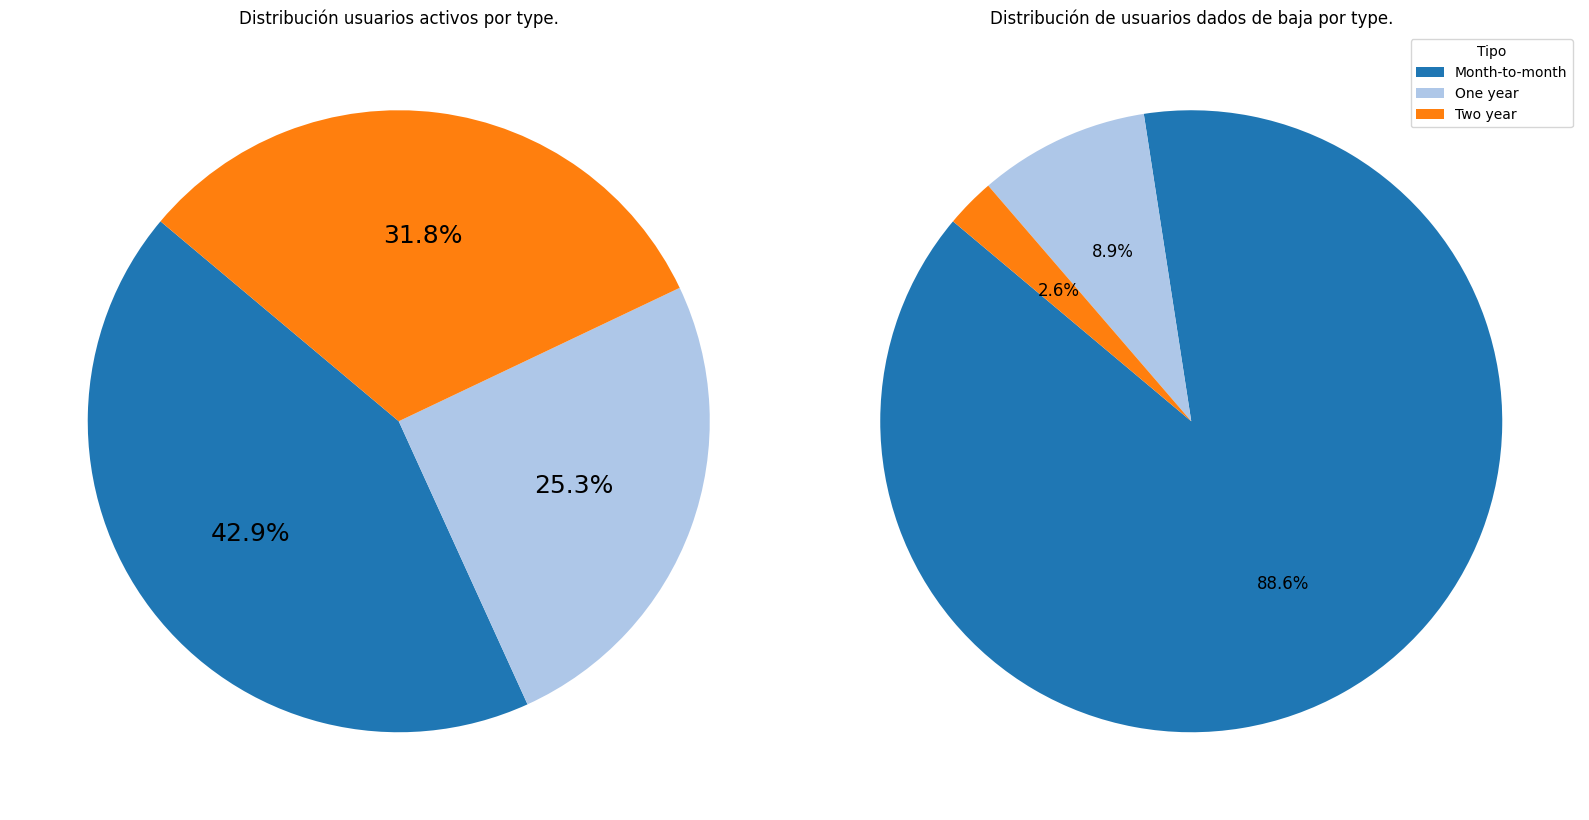

In [26]:
## obtener gráficas de pastel comparativas por usuarios activos e inactivos de la característica "tipo de plan".
pie_for_column(contract,'type')

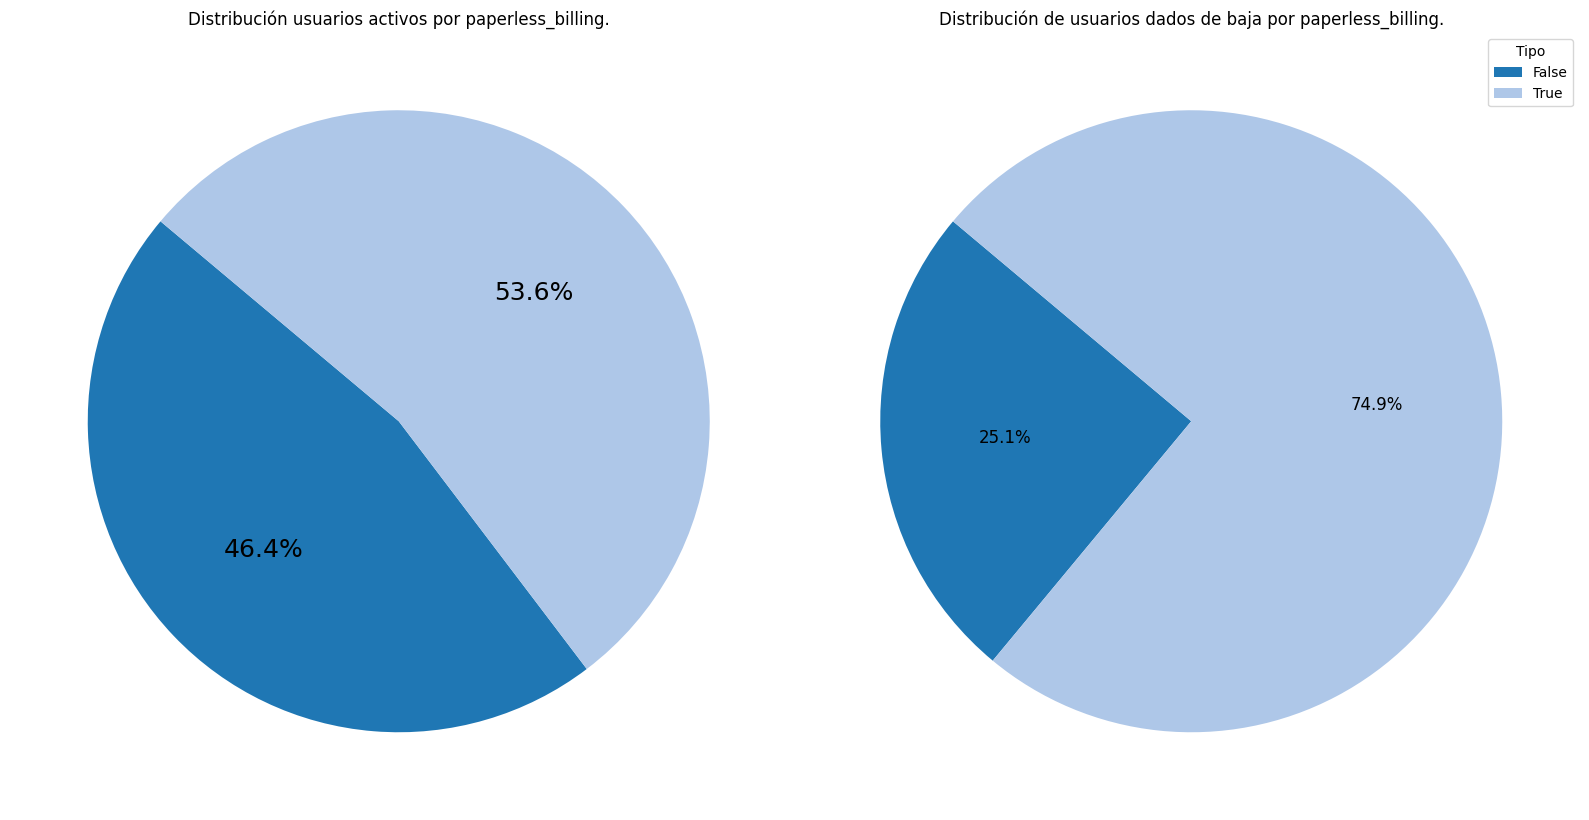

In [27]:
## obtener gráficas de pastel comparativas por usuarios activos e inactivos de la característica "forma de facturación" digital o impresa.
pie_for_column(contract, 'paperless_billing')

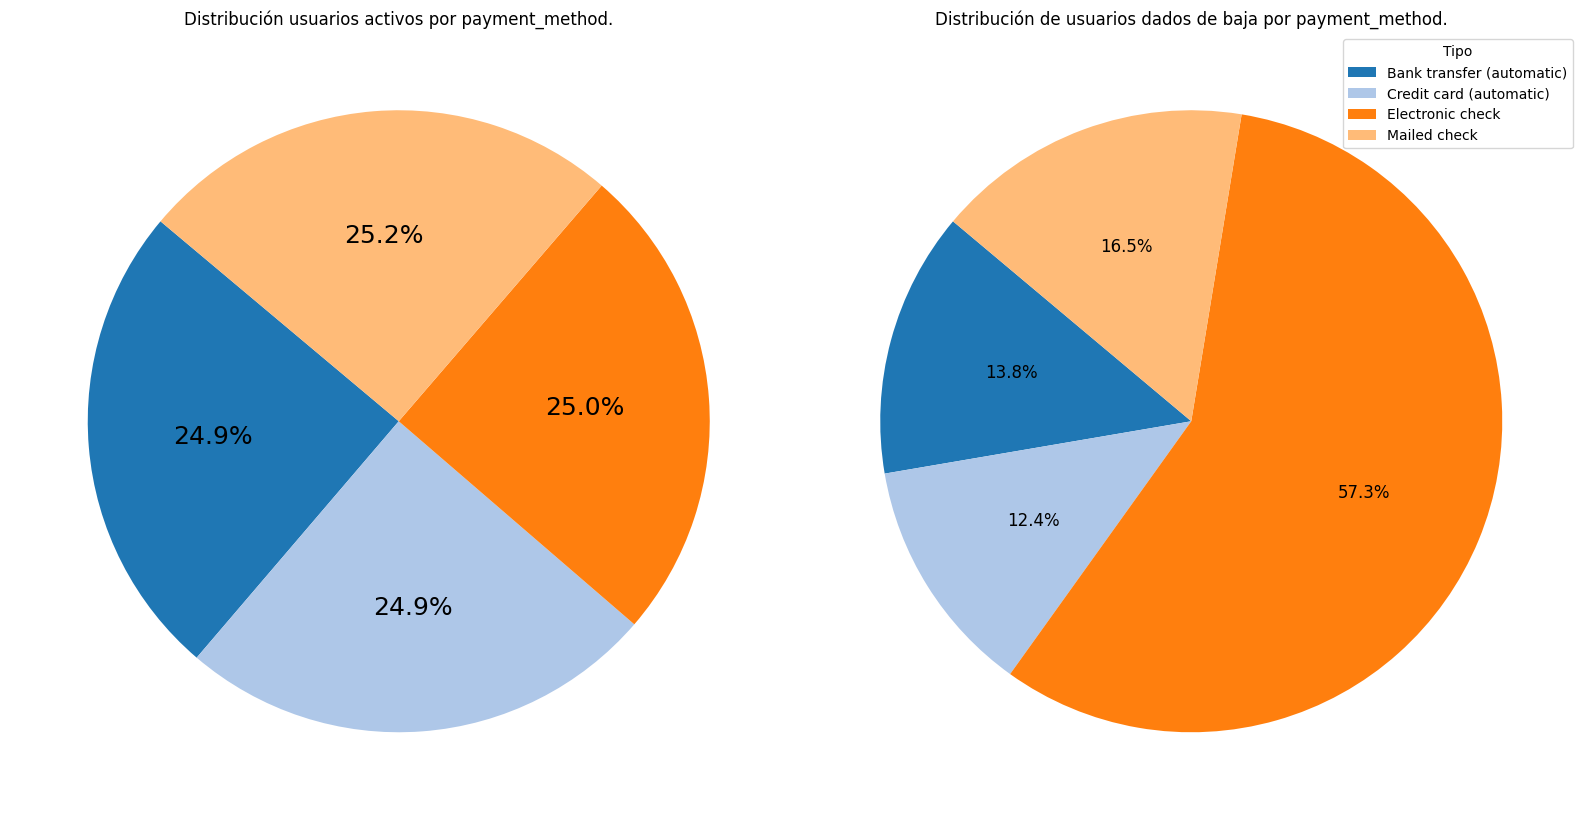

In [28]:
## obtener gráficas de pastel comparativas por usuarios activos e inactivos de la característica "método de pago".
pie_for_column(contract, 'payment_method')

En los tres casos anteriores que corresponden a las características de variables categóricas en los datos de `contract` se observa una diferencia relativa y dependiente de si corresponden a los usuarios activos o los dados de baja.

1) **type** (*tipo de plan*). Se determina que los usuarios que se dan de baja en su mayoría es por el tipo de plan mensual, marcándose una fuerte tendencia a ser usuario activo si el tipo de plan es anual o bienal.

2) **paperless_billing** (*facturación digital*). El porcentaje de usuarios que preferían una facturación digital aumenta de 53.6% a 74.5% cuando evaluamos entre usuarios activos e inactivos.

3) **payment_method** (*método de pago*). Un fuerte motivo de la baja en usuarios pudiera darse por la forma del método de pago marcando un aumento en las bajas debido a la forma de pago de chequera electrónica.

Cada uno de las características anteriores muestra diferencias notables entre ambas poblaciones de usuarios, otro punto a tomar en cuenta es realizar este mismo método de análisis pero para el conjunto de datos de `personal` para encontrar y verificar que las causas de las bajas probablemente fuera por el tipo de nivel socioeconómico de los usuarios.

#### Crear conjunto de datos global (*all_data*)

Como todos los conjuntos de datos tienen una columna en común (`customer_id`) se adjuntarán todas en un solo dataframe,, esto con el fin de tener un menjor manejo de ellos y para tener la mayor cantidad de características al momento de llegar hacerse un modelo de predicción (*es parte del objetivo general del proyecto*).

In [29]:
## unir todos los datos disponibles con respecto a su customer_id
all_data = contract.merge(personal, how='outer', on ='customer_id')
all_data = all_data.merge(internet, how='outer', on = 'customer_id')
all_data = all_data.merge(phone, how='outer', on = 'customer_id')
all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   BeginDate          7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   bool          
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   bool          
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   bool          
 10  partner            7043 non-null   bool          
 11  dependents         7043 non-null   bool          
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

Como se observa, tenemos valores nulos, y esto es porque algunos usuarios no han contratado los servicio de internet o de telefonía, una de las opciones es asignar a los valores ausentes  los booleanos como **false** debido a que no cuentan con esos servicios.

In [30]:
all_data['internet_service'].unique()

array(['DSL', 'Fiber optic', nan], dtype=object)

In [31]:
all_data[all_data['internet_service'].isna()].count()

customer_id          1526
BeginDate            1526
end_date             1526
type                 1526
paperless_billing    1526
payment_method       1526
monthly_charges      1526
total_charges        1526
gender               1526
senior_citizen       1526
partner              1526
dependents           1526
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
multiple_lines       1526
dtype: int64

In [32]:
nan_internet['customer_id'][0]

NameError: name 'nan_internet' is not defined

In [ ]:
## usuarios que no contrataron internet
def percent_by_column(df, column):
    column = column
    temp = pd.DataFrame(df[df[column].isna()].groupby('end_date')['customer_id'].count())
    temp.reset_index(inplace=True)
    temp['porcentaje'] = temp['customer_id'][0] / temp['customer_id'].sum()*100
    temp.at[1, 'porcentaje'] = 100 - temp['porcentaje'][0]
    return temp

In [ ]:
percent_by_column(all_data, 'internet_service')

,end_date,customer_id,porcentaje
0,False,1413,92.59502
1,True,113,7.40498


La tabla anterior muestra a aquellos usuarios que no contrataron el servicio de internet mostarndo que un **92.59%** de los que no contrataron el servicio de internet siguen activos.

In [ ]:
percent_by_column(all_data, 'multiple_lines')

,end_date,customer_id,porcentaje
0,False,512,75.073314
1,True,170,24.926686


En este caso, se observa que para aquellos usuarios que **NO** contrataron el servicio de líneas telefónicas múltiples el **74.93%** siguen activos. 

El análisis a investigar es que, mientras que en aquellos que no contratan lineas múltiples, la cantidad de bajas de usuarios es igual que el porcentaje global, en el caso de aquellos usuarios que **NO** contratan internet hay una fuerte retención de usuario.

#### Conclusión intermedia

Existe algo del servicio de internet que provoca que no exista buena retención de usuarios, se sospecha que sea el cargo mensual-total o tal vez la causa sea alguno de los servicios de internet que ofrece, por lo que será objeto de investigación.

In [ ]:
## porcentajes de usuarios activos e inactivos que contratan servicios de internet con respecto al promedio de cargo mensual
all_data[~all_data['internet_service'].isna()].groupby('end_date')['monthly_charges'].mean()

end_date
False    76.341532
True     77.920985
Name: monthly_charges, dtype: float64

Al parecer que el ususario sea activo o se dé de baja es independiente del cargo_mensual.

In [ ]:
## porcentajes de usuarios activos e inactivos que contratan servicios de internet con respecto al promedio de cargo total
all_data[~all_data['internet_service'].isna()].groupby('end_date')['total_charges'].mean()

end_date
False    3244.372388
True     1619.176509
Name: total_charges, dtype: float64

Este resultado marca poca información desde el punto de vista estadístico, ya que se puede inferir que un usuario activo probablemente lo haya estado desde hace mucho tiempo a diferencia del usuario que se da de baja quien termina de pagar y por lo cual su monto total es bajo.

Hasta este punto no se descarta que el tener servicio de internet no provoque la salida de usuarios por lo cual se hará énfasis al momento de estudiar qué características de los datos de `internet` pueden provocar la fuga de usuarios.

Por otra parte, se va a crear un relleno de valores ausentes como False ya que el modelo debe de comprender que un grupo de usuarios no contrata algún servicio.

In [ ]:
## rellenar valores ausentes como false y hacerlos booleanos

all_data = all_data.fillna('False')

for col in all_data.columns:
    if all_data[col].dtype == 'object':
        try:
            if all_data[col].isin(['True', 'False']).any():
                all_data[col] = all_data[col].fillna('False')
                all_data[col] = all_data[col].astype('bool')
                print(f"La columna '{col}' fue convertida a tipo de datos bool")
        except ValueError or TypeError:
            pass

La columna 'internet_service' fue convertida a tipo de datos bool
La columna 'online_security' fue convertida a tipo de datos bool
La columna 'online_backup' fue convertida a tipo de datos bool
La columna 'device_protection' fue convertida a tipo de datos bool
La columna 'tech_support' fue convertida a tipo de datos bool
La columna 'streaming_tv' fue convertida a tipo de datos bool
La columna 'streaming_movies' fue convertida a tipo de datos bool
La columna 'multiple_lines' fue convertida a tipo de datos bool


In [ ]:
print(all_data.info())
all_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   BeginDate          7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   bool          
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   bool          
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   bool          
 10  partner            7043 non-null   bool          
 11  dependents         7043 non-null   bool          
 12  internet_service   7043 non-null   bool          
 13  online_security    7043 non-null   bool          
 14  online_b

,customer_id,BeginDate,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,False,Month-to-month,True,Electronic check,29.85,29.85,Female,False,True,False,True,False,True,False,False,False,False,True
1,5575-GNVDE,2017-04-01,False,One year,False,Mailed check,56.95,1889.50,Male,False,False,False,True,True,False,True,False,False,False,False
2,3668-QPYBK,2019-10-01,True,Month-to-month,True,Mailed check,53.85,108.15,Male,False,False,False,True,True,True,False,False,False,False,False
3,7795-CFOCW,2016-05-01,False,One year,False,Bank transfer (automatic),42.30,1840.75,Male,False,False,False,True,True,False,True,True,False,False,True
4,9237-HQITU,2019-09-01,True,Month-to-month,True,Electronic check,70.70,151.65,Female,False,False,False,True,False,False,False,False,False,False,False


No exitió un aumento en las filas a momento de hacer la conjunción de las tablas a través de `customer_id` por lo que se asume que no hay ningún usuario fuera del contrato.

In [ ]:
highlight_columns = list((all_data.columns).drop(['customer_id','BeginDate','monthly_charges','total_charges','end_date', 'type']))

In [ ]:
## realizar pivote para las columnas originales
pivot_original = pd.pivot_table(all_data, index='end_date', columns='type', values='total_charges', aggfunc='count')

## realizar pivote para las columnas de highlight_columns
pivot_columns = highlight_columns
pivot_results = []

for column in pivot_columns:
    pivot_temp = pd.pivot_table(all_data, index='end_date', columns=column, values='total_charges', aggfunc='count')
    pivot_results.append(pivot_temp)

## unir los resultados
final_pivot = pd.concat([pivot_original] + pivot_results, axis=1, keys=['type'] + pivot_columns, names=['type', 'column'])

## cambiar los sufijos a las columnas correspondientes
final_pivot.columns = [f'{col[1]}_{col[0]}' if col[0] in pivot_columns else col[1] for col in final_pivot.columns]
final_pivot.reset_index(inplace=True)

In [ ]:
## generar una tabla comparativa entre usuarios activos e inactivos
comp = final_pivot.T
comp[f'porcent_activos'] = comp[0] / (comp[0] + comp[1])*100
comp[f'porcent_inactivos'] = 100-comp[f'porcent_activos']
comp = comp.rename(columns={
    0 : 'Activos',
    1 : 'Dados de baja'})

comp.query('porcent_activos < 75').sort_values(by='porcent_inactivos', ascending=False)

## los resultados que se muestran 

,Activos,Dados de baja,porcent_activos,porcent_inactivos
end_date,False,True,0.0,100.0
Electronic check_payment_method,1294,1071,54.714588,45.285412
Month-to-month,2220,1655,57.290323,42.709677
False_online_security,2037,1461,58.233276,41.766724
True_senior_citizen,666,476,58.318739,41.681261
False_tech_support,2027,1446,58.364526,41.635474
False_online_backup,1855,1233,60.071244,39.928756
False_device_protection,1884,1211,60.872375,39.127625
False_streaming_movies,1847,938,66.319569,33.680431
True_paperless_billing,2771,1400,66.434908,33.565092


La tabla anterior muestra las columnas de interés donde se ha aplicado un filtro obteniendo las variables categóricas donde el porcentaje entre usuarios activos con respecto a llos inactivos (dados de baja) es mayor, obteniendo los puntos clave sobre los probables causas o características que presentan los usuarios que se dan de baja, la lista en orden de prioridad de las 7 causas principales son las siguiente:

1) **Método de pago por cheque electrónico** - 45.29%
2) **Plan de pago mensual** - 42.71%
3) **No contratan seguridad en línea** - 41.77%
4) **Personas de edad avanzada** - 41.68%
5) **No contratan el soporte técnico** - 41.64%
6) **No contratan copia de seguridad en la nube** - 39.93%
7) **No contratan protección de dispositivos** - 39.13%

De esta lista, los puntos **1**, **2** y **4** son independientes del tipo de contrato que hayan escogido, en los otros casos es necesario un contrato previo de internet en un tipo de plan avanzado.

Dentro de la lista, anteriormente ya se habían expuesto `payment_method` y `type`, siendo el top 1 y 2 delas características más sobresalientes, ahora al tener el conjunto de datos en un solo DataFrame podemos realizar gráficas pastel de los faltantes, para este punto solo crearemos las gráficas para `online_security`, `senior_citizen` y `tech_support`.

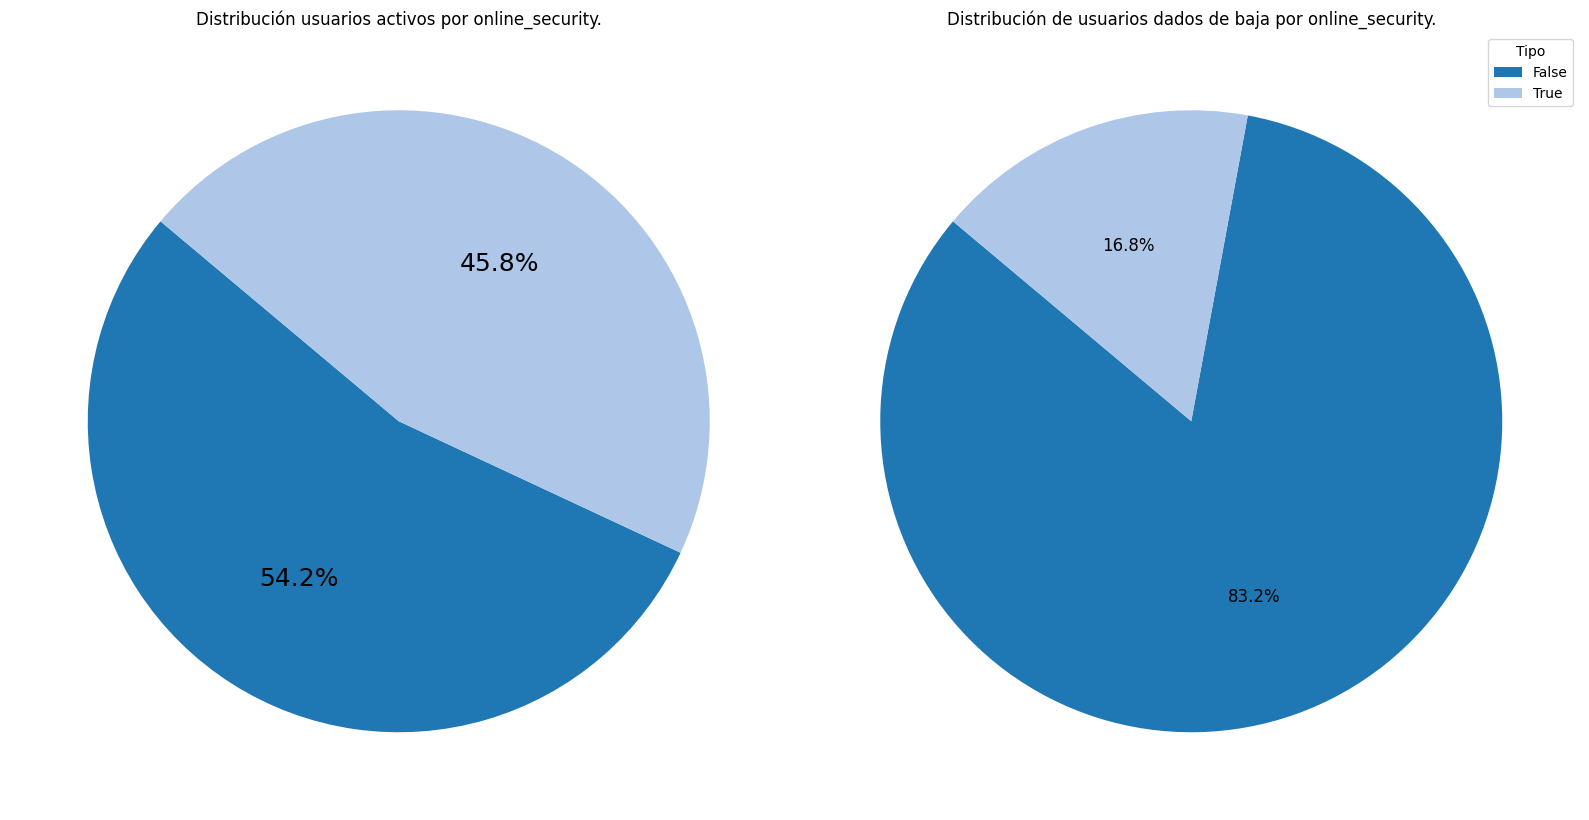

In [ ]:
pie_for_column(all_data,'online_security')

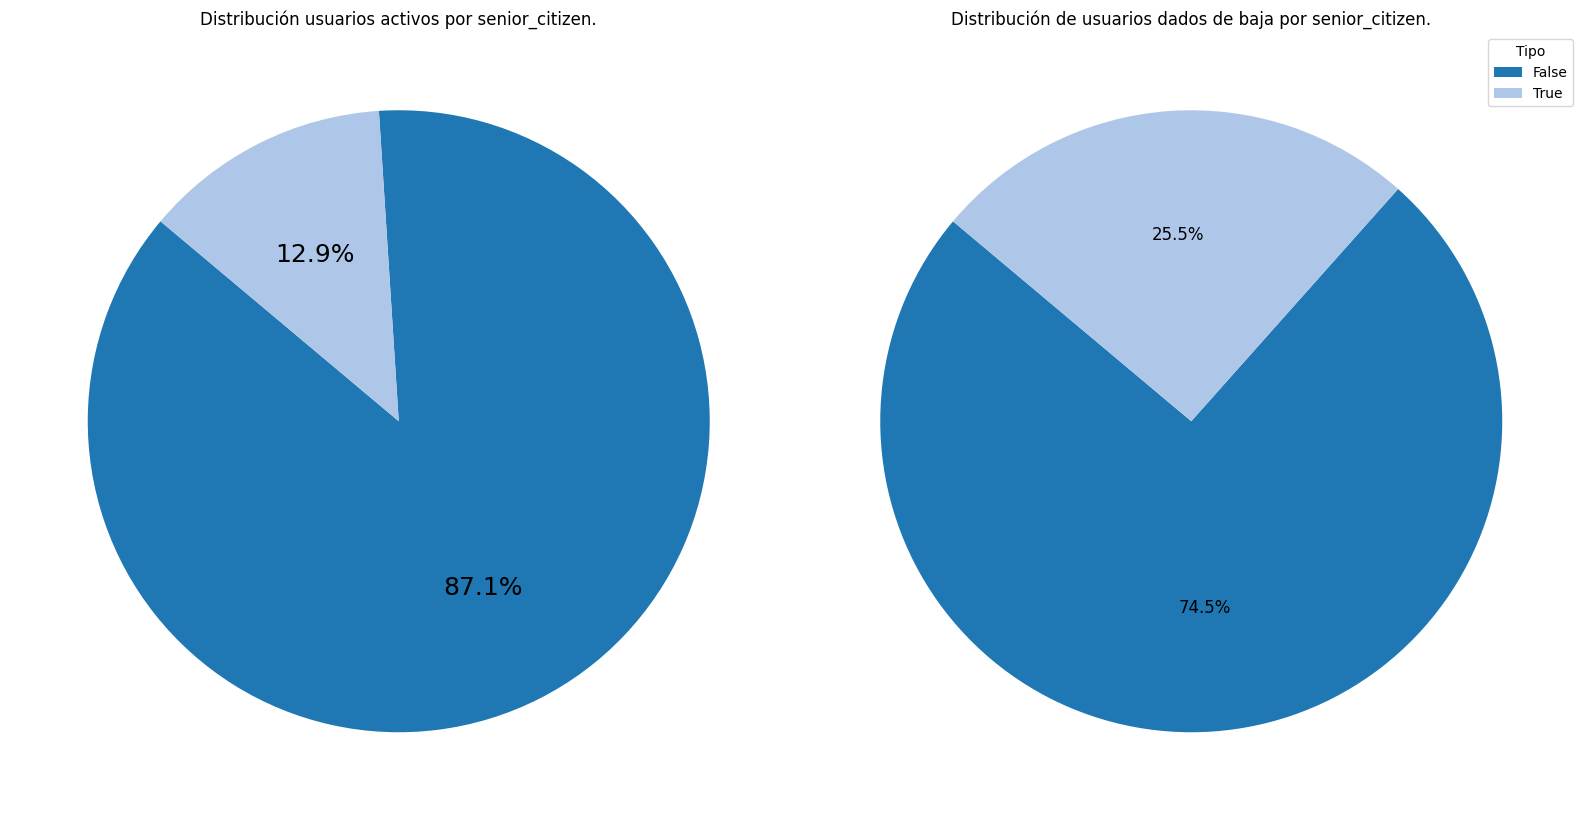

In [ ]:
pie_for_column(all_data,'senior_citizen')

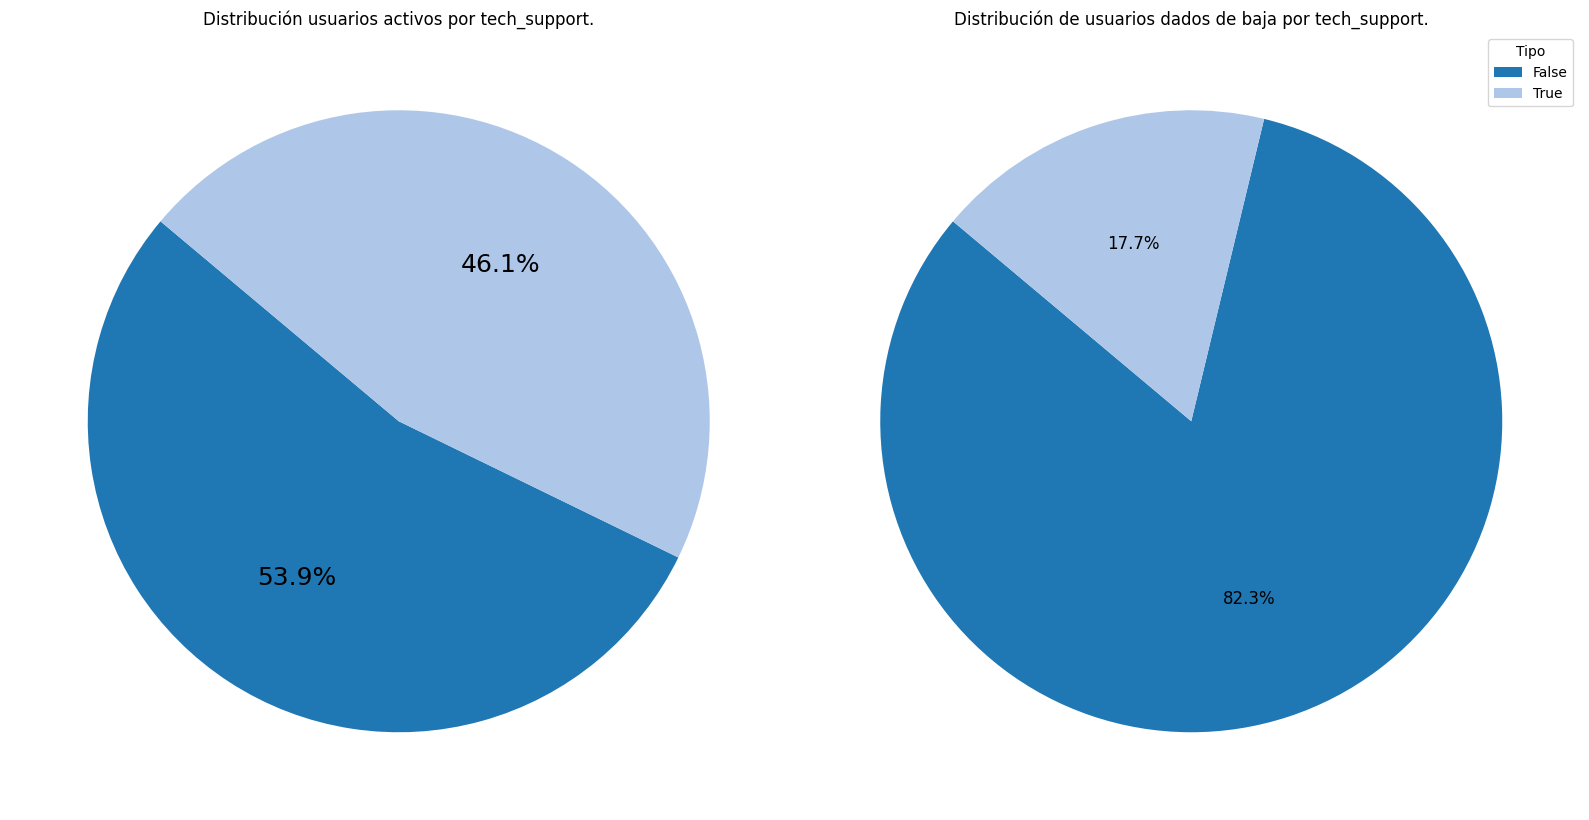

In [ ]:
pie_for_column(all_data,'tech_support')

Estas gráficas contienen buena información ya que tomando de ejemplo el `tech_support`, la mayoría de los usuarios que se dand e baja es porque no habían tenido soporte técnico incluso en la seguridad se muestra el mismo patron.

#### Conclusión intermedia

Sí se observan patrones claros en tema del servicio de internet donde el no contar con ellos provoca la salida de usuarios.

A continuación se hará otro análisis exploratorio con respecto al `contract` haciendo una comparación de características entre usuarios activos e inactivos.

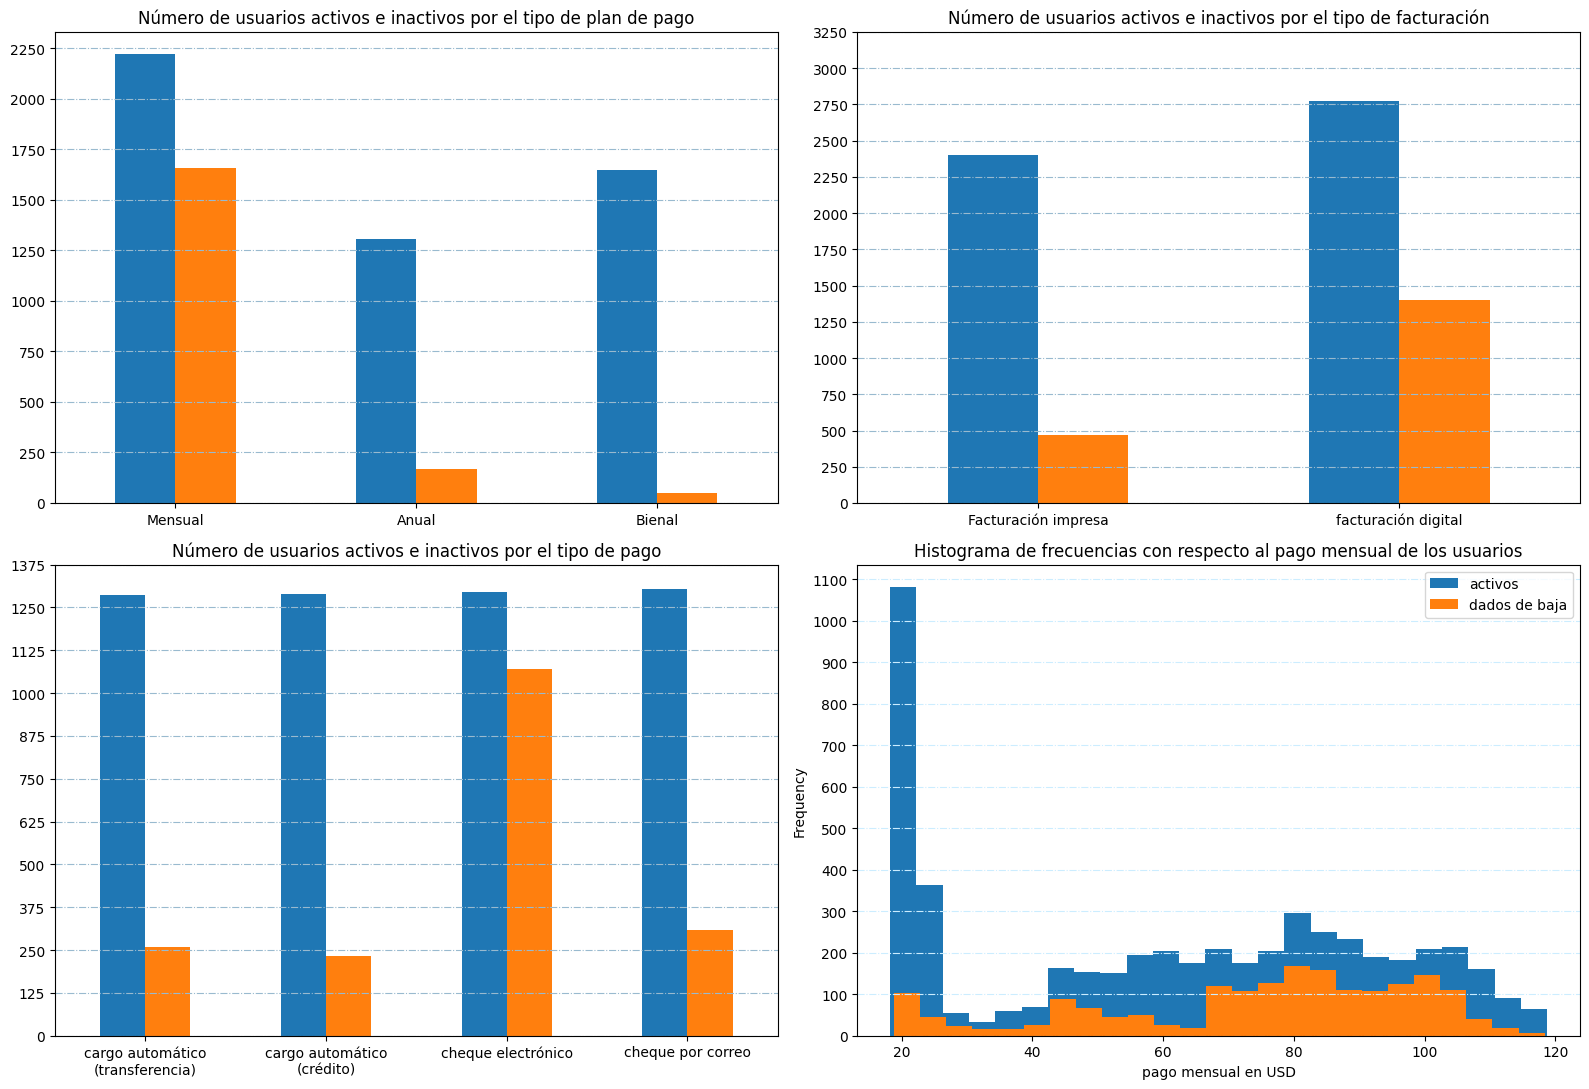

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(16,11))

ax = axs[0, 0]
pt_type = contract.pivot_table(index=['type'], columns='end_date', values='customer_id', aggfunc='count')
pt_type.plot(kind='bar', ax=ax)
ax.legend(['activos', 'dados de baja'],).set_visible(False)
ax.set_title('Número de usuarios activos e inactivos por el tipo de plan de pago')
ax.set_yticks(np.arange(0, 2500, 250))
ax.yaxis.grid(True, color=(0.6,0.73,0.81), linestyle='-.')
ax.tick_params(axis='x', rotation=0)
ax.set_xticklabels(['Mensual', 'Anual', 'Bienal'])
ax.set_xlabel('')

ax = axs[0,1]
pt_paperless_billing = contract.pivot_table(index ='paperless_billing', columns='end_date', values='customer_id', aggfunc='count')
pt_paperless_billing.plot(kind='bar', ax=ax)
ax.legend(['activos', 'dados de baja']).set_visible(False)
ax.set_title('Número de usuarios activos e inactivos por el tipo de facturación')
ax.set_yticks(np.arange(0, 3500, 250))
ax.yaxis.grid(True, color=(0.6,0.73,0.81), linestyle='-.')
ax.set_xticklabels(['Facturación impresa', 'facturación digital'])
ax.tick_params(axis = 'x', rotation=0)
ax.set_xlabel('')

ax = axs[1,0]
pt_payment = contract.pivot_table(index ='payment_method', columns='end_date', values='customer_id', aggfunc='count')
pt_payment.plot(kind='bar', ax=ax)
ax.legend(['activos', 'dados de baja']).set_visible(False)
ax.set_title('Número de usuarios activos e inactivos por el tipo de pago')
ax.set_yticks(np.arange(0, 1500, 125))
ax.yaxis.grid(True, color=(0.6,0.73,0.81), linestyle='-.')
ax.set_xticklabels(['cargo automático\n(transferencia)', 'cargo automático\n(crédito)', 'cheque electrónico', 'cheque por correo'])
ax.tick_params(axis = 'x', rotation=0)
ax.set_xlabel('')

ax = axs[1,1]
pt_charges = contract.groupby('end_date')['monthly_charges']
pt_charges.plot(kind='hist', bins=25)
ax.legend(['activos', 'dados de baja'])
ax.set_title('Histograma de frecuencias con respecto al pago mensual de los usuarios')
ax.set_yticks(np.arange(0, 1200, 100))
ax.yaxis.grid(True, color=(0.8,0.93,1), linestyle='-.')
ax.set_xlabel('pago mensual en USD')

# plt.subplots_adjust(bottom=0.75)
plt.tight_layout()
plt.show()

Gracias a las gráficas anteriores se puede inferir que existe evidencia que cuando el método de pago es mensual casi la mitad de ellos se da de baja a diferencia de si mantienenn un plan anual o bienal, la explicación a este fenómeno es que cuando hacen un pago que no sea mensual evitan el estar pagando constantemente aunque no sea una cifra grande, desde el punto de vista del usuario, al parecer el "no molestarlo" al recordarle un cargo mensual evita el que se vayan, un punto estratégico es este a través de beneficios a los que hacen su cargo  por el tipo de plan anual o bienal ya sea un descuento o beneficios extra, eso lo determinaría otro departamento.

Otra información relevante en las gráficas anteriores es la fuerte diferencia entre activos y dados de baja en la característica del tipo de pago observando que cuando pagan con **cheque electrónico** existe una mayor probabilidad de que los usuarios se den de baja, es probable que el proceso de pago por medio de cheques electrónicos sea más complicado o se esté experimentando problemas por medio de ese método de pago lo que prácticamente obliga hasta un buen usuario a cambiar de método de pago o simplemente darse de baja.


In [ ]:
## Análisis descriptivo sobre los cargos mensuales o totales con respecto a los usuarios activos
contract.query('end_date == True')[['monthly_charges','total_charges']].describe()

,monthly_charges,total_charges
count,1869.000000,1869.000000
mean,74.441332,1531.796094
std,24.666053,1890.822994
min,18.850000,18.850000
25%,56.150000,134.500000
50%,79.650000,703.550000
75%,94.200000,2331.300000
max,118.350000,8684.800000


In [ ]:
## Análisis descriptivo sobre los cargos mensuales o totales con respecto a los usuarios dados de baja
contract.query('end_date == False')[['monthly_charges','total_charges']].describe()

,monthly_charges,total_charges
count,5174.000000,5174.000000
mean,61.265124,2549.999497
std,31.092648,2329.858843
min,18.250000,18.800000
25%,25.100000,572.900000
50%,64.425000,1679.525000
75%,88.400000,4262.850000
max,118.750000,8672.450000


Los resultados anteriores muestran una media poblacional de cargo mensual de 74 para los usuarios que se dieron de baja y una media de 61 para aquellos que siguen activos, probablemente la cantidad mayor de cargo mensual provoque el retiro de usuario, sería interesante evaluar un hipótesis sobre este hecho ya que observamos que otros valores estadísticos como la mínima o la máxima como valores limitantes y que son prácticamente iguales, esto lo analizaremos en la sección de análisis estadístico de datos.

#### Análisis de cargos mensuales y totales

Se hace la comparativa de las dos graficas `charges` donde nos muestra el cargo mensual y el total de los usuarios, la comparativa es sobre el conjunto de usuarios activos y dados de baja, creando una distribución en modo de histograma que refleja las frecuencias de usuario con respecto a su pago (mensual o total).

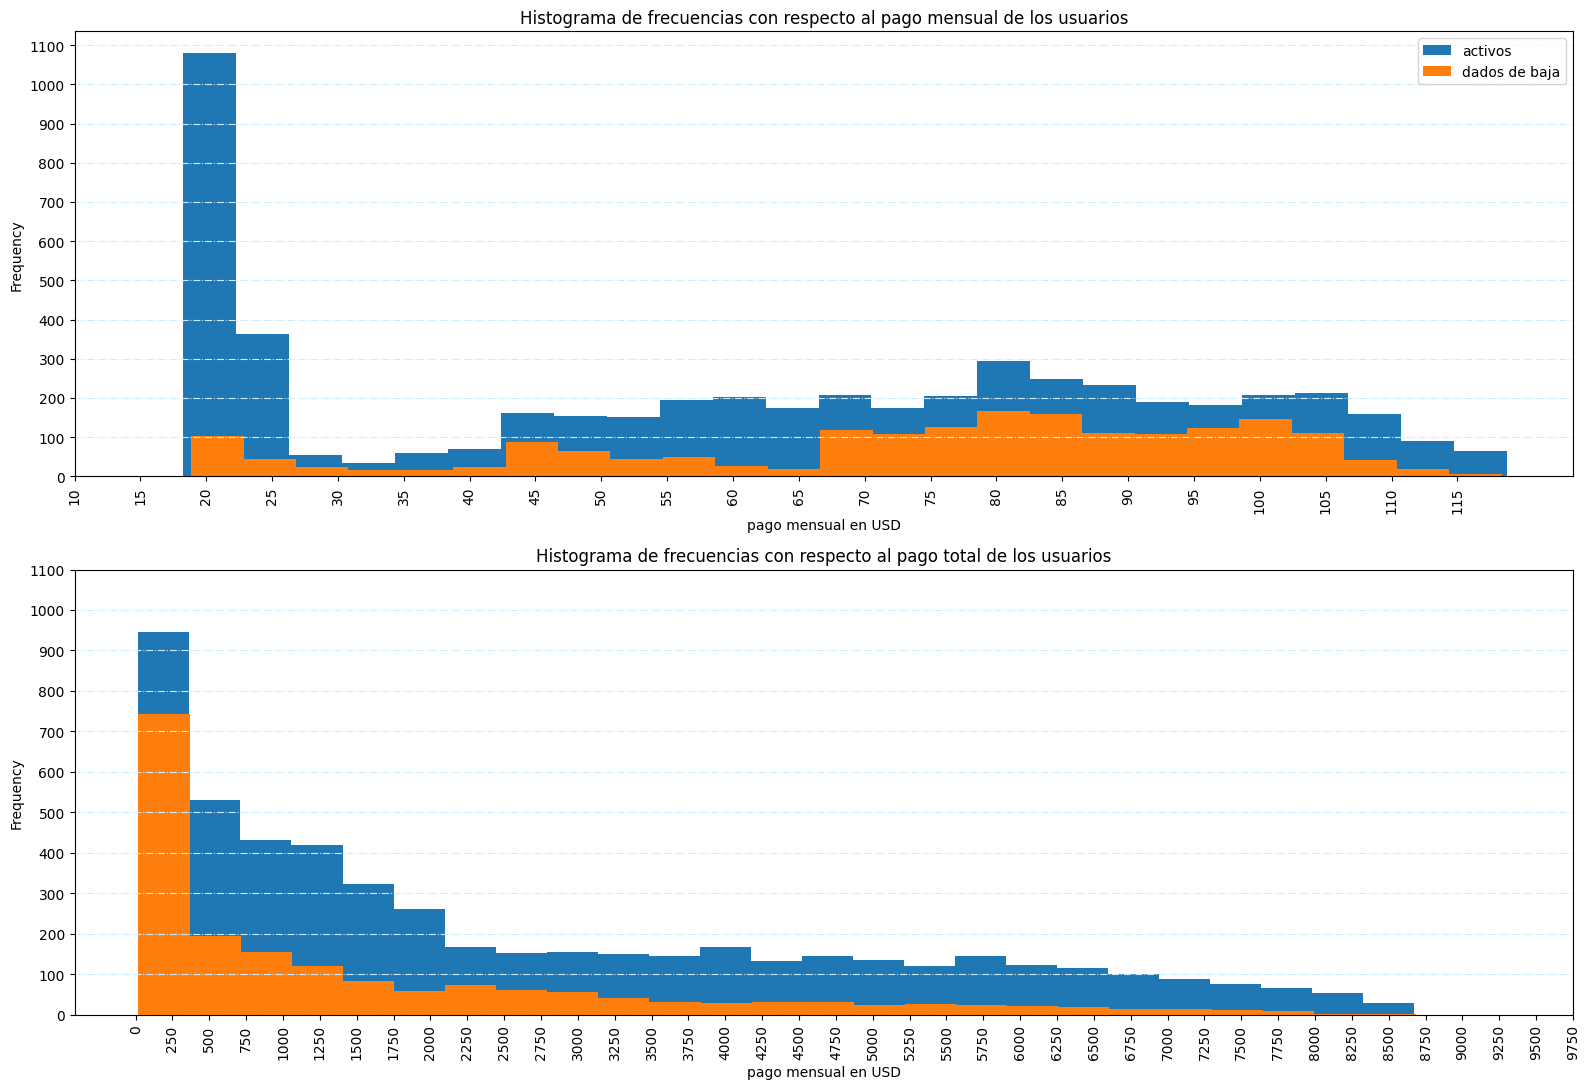

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(16,11))

ax = axs[0]
pt_charges = contract.groupby('end_date')['monthly_charges']
pt_charges.plot(kind='hist', bins=25, ax=ax)
ax.legend(['activos', 'dados de baja'])
ax.set_title('Histograma de frecuencias con respecto al pago mensual de los usuarios')
ax.set_yticks(np.arange(0, 1200, 100))
ax.set_xticks(np.arange(10, 120, 5))
ax.tick_params(axis = 'x', rotation=90)
ax.yaxis.grid(True, color=(0.8, 0.93, 1), linestyle='-.')
ax.set_xlabel('pago mensual en USD')

ax = axs[1]
pt_charges = contract.groupby('end_date')['total_charges']
pt_charges.plot(kind='hist', bins=25, ax=ax)
ax.set_title('Histograma de frecuencias con respecto al pago total de los usuarios')
ax.set_yticks(np.arange(0, 1200, 100))
ax.set_xticks(np.arange(0,10000, 250))
ax.tick_params(axis = 'x', rotation=90)
ax.yaxis.grid(True, color=(0.8, 0.93, 1), linestyle='-.')
ax.set_xlabel('pago mensual en USD')

plt.tight_layout()
plt.show()

Se observa en la primera gráfica que una gran parte de los usuarios aplica el pago mensual a una cuota aproximadamente de 20USD, desde este punto se puede partir para crear una gáfica de cajas y observar dónde es que cae la mayor cantidad de usuarios, hay varias cuestiones que se pueden hacer, ¿qué diferencia en servicios tienen los usuarios que pagan un monto mayor de  20 USD?, ¿es más probable que se den de baja los usuarios "premium" o los de plan "básico"? y ¿existe un punto en el que los cargos mensuales es del desagrado de los usuarios, es decir, hay algo en común o reelevante en los usuarios que se dan de baja el cual sea el motivo de dicha baja que  no exista en los activos?.

In [ ]:
## calcular las medias muestrales de usuarios activos e inactivos con respecto al plan de pago
contract.pivot_table(index='type', columns='end_date', values='monthly_charges', aggfunc=['mean','median'])

mean            median        
end_date            False      True   False   True 
type                                               
Month-to-month  61.462635  73.019396  64.95  79.050
One year        62.508148  85.050904  64.85  95.050
Two year        60.012477  86.777083  63.30  97.275

In [ ]:
## calcular las medias muestrales de usuarios activos e inactivos con respecto al plan de pago
contract.pivot_table(index='type', columns='end_date', values='total_charges', aggfunc=['mean','median'])

mean                 median          
end_date              False        True      False     True 
type                                                        
Month-to-month  1521.927590  1164.460574   830.525   514.000
One year        2901.363428  4066.212048  2475.350  4098.525
Two year        3656.913267  5432.363542  3510.300  5874.250

La tabla pivote nos brinda información sólida (media y mediana se corroboran en ambas vertientes) de que los usuarios cuyo **tipo de pago** es `Month-to-month` el cargo total es menor en aquellos que se dan de baja que en los que se mantienen activos en diferencia  con `One year` y `Two year`, esto se cumple desde el punto de vista de cargos totales y no tiene relevancia cuando se habla de los cargos mensuales donde sin importar el **tipo de pago**, los  usuarios se dan de baja porque el cargo es mayor.

## Análisis estadísticos de datos

Se quiere saber si la diferencia de las medias muestrales de los cargos mensuales y cargos totales entre las poblaciones de usuarios activos y dados de baja son diferentes y estadísticamente significativos.

HIPÓTESIS  NULA: EL promedio de los cargos mensuales entre los usuarios activos y los dados de baja son estadísticamente iguales.

In [ ]:
## crear los dos conjuntos de poblaciones
true_mc = contract.query('end_date == True')['monthly_charges']
false_mc = contract.query('end_date == False')['monthly_charges']

alpha  = 0.01
results = st.ttest_ind(true_mc, false_mc, equal_var = False)

print('p_value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula\nExiste una diferencia estadisticamente significativa en las medias de cargos mensual entre ambas poblaciones")
else:
    print("No rechazamos la hipótesis nula\nAmbas poblaciones tienen estadísticamente la misma media")

p_value: 8.59244933154705e-73
Rechazamos la hipótesis nula
Existe una diferencia estadisticamente significativa en las medias de cargos mensual entre ambas poblaciones


Lo anterior deja en evidencia que es probable de que un usuario con un promedio de cargo mensual de 74 USD se dé de baja a diferencia de un usuario cuyo promedio de cargo mensual sea de 61 USD.

## Preguntas

Hasta este punto creamos el siguiente resumen de cuestionamientos:

¿Por qué el servicio de internet aparentemente está provocando la fuga de usuarios?
¿Qué patrón tiene el cargo mensaul con el total? la probable respuesta sería buscar el periodo completo de fecha de inicio y termino que, al calcularlo de manera mensual arroja el cargo total?
¿Cómo podemos hacer un pronóstico de por qué los usuarios se dan de baja? La estrategia a seguir es crear un modelo de predicción donde el objetivo sea si el usuario se dió de baja o sigue activo (`end_date`), y los features sean todas las características del concentrado de datos (**all_data**), encontrar el mejor modelo y revisar los features que más peso tuvieron para el modelo.
¿Cómo podemos encontrar qué features son más importantes para el modelo de predicción? Probablemente una vez que se tengan los modelos entrenados se va a utilizar por ejemplo, en modelos de clasificación como árbol de decisiones se puede llamar al método .feature_importances y así encontrar qué características son relevantes y encontar un punto de estrategia para retener usuarios al conocer estas característcias.

## Métricas deseadas y calificación de proyecto

Característica objetivo: la columna `'EndDate'` es igual a `'No'`.

Métrica principal: AUC-ROC.

Métrica adicional: exactitud.

Criterios de evaluación:

- AUC-ROC < 0.75 — 0 SP
- 0.75 ≤ AUC-ROC < 0.81 — 4 SP
- 0.81 ≤ AUC-ROC < 0.85 — 4.5 SP
- 0.85 ≤ AUC-ROC < 0.87 — 5 SP
- 0.87 ≤ AUC-ROC < 0.88 — 5.5 SP
- AUC-ROC ≥ 0.88 — 6 SP

In [ ]:
session_info.show()

## Preprocesamiento de datos

In [36]:
## División de los modelos de entrenamiento, validación y prueba
train, val = train_test_split(all_data, test_size=0.25, random_state=9999)

# Mostrar el tamaño de cada segmento
print("Tamaño del conjunto de entrenamiento:", len(train))
print("Tamaño del conjunto de validación:", len(val))

# crear el set de features y target para nuestros conjuntos de datos
x_train = train.drop(['end_date','u')

Tamaño del conjunto de entrenamiento: 5282
Tamaño del conjunto de validación: 1761
